<a href="https://colab.research.google.com/github/tzoung-yu/TrueVolume/blob/main/%E6%96%B0_(V)MACD%2BTrueVolume%E4%B8%8A%E5%B8%82%E4%B8%8A%E6%AB%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
2327 國巨 上市 電子零組件業
統計起始日:2023/10/14


[*********************100%%**********************]  1 of 1 completed


2024-04-30  625.0 量: 2133
本益比 14.18 殖利率 3.72
股價淨值比 1.84
MACD 月: >0 週: >0 日: >0
balanced macd: 0.62
 **月均線向上**


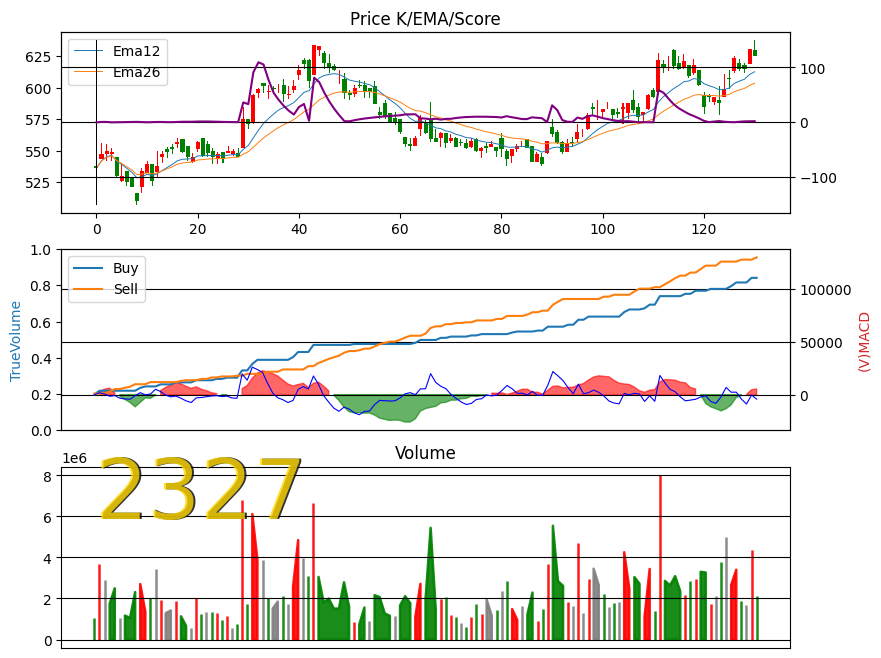

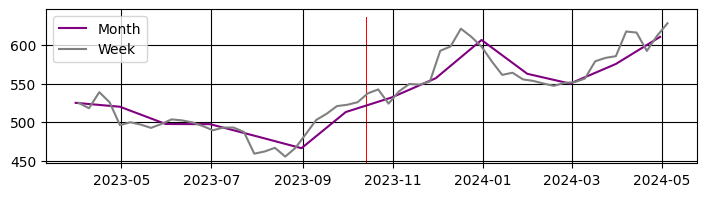

In [ ]:
!pip install twstock >log.txt
#!twstock -U
import twstock
from twstock import Stock
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import matplotlib as mpl
import yfinance as yf
import pandas as pdd
import requests
import time
with_fmind = 1
if with_fmind == 1:
  !pip install FinMind > log.txt
  from FinMind.data import DataLoader
  fmind = DataLoader()

#股票代號
stoid='2327'

yfonly = -1
no_twstock = -1
Get_realtime = 1
show_per = 1
if yfonly!=1 and show_per == 1:
  from google.colab import drive
  drive.mount('/content/drive')

thisday = datetime.today()
day_start = thisday - timedelta(days=400)
draw_start = thisday - timedelta(days=200)
#day_start = thisday.replace(month=1, day=1)

def TrueVol(pd):
  df=pd
  global thisday
  global draw_start
  end_date = thisday
  start_date = draw_start
  df = df[df['Date'].between(start_date, end_date)]
  df = df.reset_index(drop=False)
  opp=df['Open']
  clo=df['Close']
  voo=df['Volume']
  hig=df['High']
  llo=df['Low']
  upl=[]
  dol=[]
  bll=[]
  upc=0.0
  dlc=0.0
  blc=0.0
  lp=0.0
  lgv=1.0
  lgc=0.0
  upordown=0.0
  xvo=[]
  for i in range(len(opp)):
    if clo[i]>lgc:
      lgc=clo[i]
    if(lp==0.0):
      lp=opp[i]
    upordown=0
    if opp[i]>=lp:
      if clo[i]>lp and (clo[i]> opp[i] + ((hig[i] - opp[i])/2.38) or clo[i] >= lp + ((hig[i] - lp)/1.88)):
        upc+=(voo[i]/1000)
        upordown=1
      else:
        if clo[i]<lp or clo[i]<llo[i]+((hig[i]-llo[i])/5.8):
          dlc+=(voo[i]/1000)
          upordown=-1
    else:
      if clo[i]<lp:
        dlc+=(voo[i]/1000)
        upordown=-1
      else:
        if clo[i]>lp+((hig[i]-lp)/2.38):
          upc+=(voo[i]/1000)
          upordown=1
    upl.append(upc)
    dol.append(dlc)
    blc+=voo[i]/1000
    bll.append(blc/2)
    xvo.append(upordown)
    lp=clo[i]
    if(voo[i]/1000 > lgv):
      lgv=voo[i]/1000

  pdp = lgc-clo.iloc[-1]
  if pdp>0:
    pdp = pdp*100/clo.iloc[-1]
    #print("現價/高點空間: %"+str(round(pdp,1)))

  udp = upl[-1]-dol[-1]
  udp = udp*100/upl[-1]
  udps = ""
  if udp > 20:
    udps += "強勢多方: %"+str(round(udp,1))

  ema10=clo.ewm(span=12).mean()
  ema30=clo.ewm(span=26).mean()

  Vol12     = voo.ewm(span=12).mean()
  Vol26     = voo.ewm(span=26).mean()
  Vacd      = Vol12 - Vol26
  Vsig = Vacd.ewm(span=9).mean()
  Vhistogram =Vacd-Vsig

  exp12     = clo.ewm(span=12, adjust=False).mean()
  exp26     = clo.ewm(span=26, adjust=False).mean()
  macd      = exp12 - exp26
  signal    = macd.ewm(span=9, adjust=False).mean()
  histogram = macd - signal

  gg3 = abs(max(histogram))/abs(max(Vhistogram))
  Vhistogram = Vhistogram*gg3

  v100=np.array(voo)
  vfix=100/max(v100)
  v100=v100*vfix

  gg1=max(upl[-1], dol[-1])
  bbb=0.0
  sco=[]
  x=[]
  vlv=9999/lgv
  vlc=999/lgc
  clm=2/max(abs(histogram))
  vlm=2/max(abs(Vhistogram))
  for i in range(len(upl)):
    bbb=((ema10.iloc[i]-ema30.iloc[i])*vlc*666)+((upl[i]-dol[i])*vlv/3)
    histo = abs(bbb)*clm*histogram[i]
    if i>0 and Vhistogram[i]>0:
      ddd=histogram[i]-histogram[i-1]
      #bbb += ddd*voo[i]
      bbb += ddd*v100[i]*abs(bbb/8)
    sco.append(bbb)
    x.append(str(i))
  sco=np.array(sco)
  gg3 = 50/max(abs(sco))
  sco = sco*gg3

  sco2 = pdd.DataFrame(sco)
  Sco12     = sco2.ewm(span=12).mean()
  Sco26     = sco2.ewm(span=26).mean()
  Sacd      = Sco12 - Sco26
  #Ssig = Sacd.ewm(span=9).mean()
  #Shistogram =Sacd-Ssig

  gg3=gg1/max(abs(Vhistogram))
  Vhistogram2 = Vhistogram*gg3/5

  gg3=gg1/max(abs(histogram))
  histogram2 = histogram*gg3/5

  Sacd = np.array(Sacd)
  gg3=40/max(abs(Sacd))
  Sacd = Sacd*gg3

  df1 = pd.set_index('Date')
  # 計算月線EMA
  mEma12 = df1['Close'].resample('M').mean().ewm(span=12).mean()
  mEma26 = df1['Close'].resample('M').mean().ewm(span=26).mean()
  mMacd = mEma12 - mEma26
  mSignal = mMacd.ewm(span=9).mean()
  mHisto = mMacd-mSignal
  # 計算週線EMA
  wEma12 = df1['Close'].resample('W').mean().ewm(span=12).mean()
  wEma26 = df1['Close'].resample('W').mean().ewm(span=26).mean()
  wMacd = wEma12 - wEma26
  wSignal = wMacd.ewm(span=9).mean()
  wHisto = wMacd-wSignal

  MUP='-'
  if mHisto.iloc[-1]>0:
    MUP = '>0'
  WUP='-'
  if wHisto.iloc[-1]>0:
    WUP = '>0'
  DUP='-'
  if histogram.iloc[-1]>0:
    DUP = '>0'

  print('MACD 月:',MUP,'週:',WUP, '日:', DUP)

  macd_bal = histogram.iloc[-1]*(1/max(abs(histogram)))*0.2
  macd_bal += wHisto.iloc[-1]*(1/max(abs(wHisto)))*0.3
  macd_bal += mHisto.iloc[-1]*(1/max(abs(mHisto)))*0.5

  print("balanced macd:", round(macd_bal,2))

  if macd_bal < 0 and macd_bal > -0.38:
    Sacd = Sacd - (Sacd*macd_bal*3.8)
  if macd_bal <= -0.38:
    Sacd = Sacd + (abs(Sacd)*macd_bal*3.8)
  if macd_bal > 0.38:
    Sacd = Sacd + (abs(Sacd)*macd_bal*2.8)
    if udp >20:
      Sacd = Sacd + (abs(Sacd)*macd_bal)

  mpl.rcParams["figure.figsize"] = (9.4, 8)
  #mpl.rcParams["figure.dpi"] = 200

  ax1 = plt.subplot(311)
  ax2 = ax1.twinx()
  ax1.plot(ema10,linewidth=0.7,label='Ema12')
  ax1.plot(ema30,linewidth=0.7,label='Ema26')

  #ax2.fill_between(df.index, sco, where=(sco<0), color='purple', alpha=0.3)
  #ax2.fill_between(df.index, sco, where=(sco>0), color='purple', alpha=0.5)
  ax2.plot(Sacd, color = 'purple')
  mm = max(abs(sco))*3
  xx = [0, 0]
  h = [0-mm, mm]
  ax2.bar(xx, h, 0.1, color='black', linewidth=0)

  #ax2.fill_between(voo.index, 0-mm, where=(v100>70),color='gold',alpha=0.5,linewidth=0.8)
  #ax2.fill_between(voo.index, mm, where=(v100>70),color='gold',alpha=0.5,linewidth=0.8)

  #define width of candlestick elements
  width = 0.8
  width2 = 0.2

  #define up and down prices
  up = df[df["Close"]>=df["Open"]]
  down = df[df["Close"]<df["Open"]]

  #define colors to use
  col2 = 'green'
  col1 = 'red'

  upp = up[up["Close"]==up["Open"]]
  upp_open=upp["Open"]
  ax1.bar(upp.index,0.1,width,bottom=upp_open,color=col1)

  up_open=up["Open"]
  up_high=up["High"]
  up_low=up["Low"]
  up_close=up["Close"]
  #plot up prices
  ax1.bar(up.index,up_close-up_open,width,bottom=up_open,color=col1)
  ax1.bar(up.index,up_high-up_close,width2,bottom=up_close,color=col1)
  ax1.bar(up.index,up_low-up_open,width2,bottom=up_open,color=col1)

  dn_open=down["Open"]
  dn_high=down["High"]
  dn_low=down["Low"]
  dn_close=down["Close"]
  #plot down prices
  ax1.bar(down.index,dn_close-dn_open,width,bottom=dn_open,color=col2)
  ax1.bar(down.index,dn_high-dn_open,width2,bottom=dn_open,color=col2)
  ax1.bar(down.index,dn_low-dn_close,width2,bottom=dn_close,color=col2)

  #ax1.set_ylabel('EMA', color='tab:blue')
  #ax2.set_ylabel('Score', color='tab:blue')
  #ax1.plot(clo, linewidth=0.5)
  #plt.gca().xaxis.set_ticks([])
  plt.xticks(rotation=45, ha='right')
  plt.title('Price K/EMA/Score')
  plt.grid(color='black')
  ax1.legend()

  ax1 = plt.subplot(312)
  ax2 = ax1.twinx()
  plt.plot(upl,label='Buy')
  plt.plot(dol,label='Sell')
  #plt.fill_between(x, Vhistogram2, where=(Vhistogram2!=0), color='blue', alpha=0.6)
  #plt.fill_between(x, Vhistogram2, where=(Vhistogram2<0), color='blue', alpha=0.6)
  ax2.plot(Vhistogram2, linewidth=0.8, color='blue')
  ax2.fill_between(x, histogram2, where=(histogram2>0), color='red', alpha=0.6)
  ax2.fill_between(x, histogram2, where=(histogram2<0), color='green', alpha=0.6)
  #ax.yaxis.set_label_position("right")
  ax1.set_ylabel('TrueVolume', color='tab:blue')
  ax2.set_ylabel('(V)MACD', color='tab:red')
  plt.legend()
  plt.gca().xaxis.set_ticks([])
  #plt.title('TrueVolume/(V)MACD')
  plt.grid(color='black')

  xvo = np.array(xvo)
  plt.subplot(313)
  plt.title('Volume')
  plt.fill_between(x, voo, where=(xvo==0), color='gray', alpha=0.9,linewidth=1.8)
  plt.fill_between(x, voo, where=(xvo<0), color='green', alpha=0.9,linewidth=1.8)
  plt.fill_between(x, voo, where=(xvo>0), color='red', alpha=0.9,linewidth=1.8)
  #plt.plot(Sacd, color='blue')
  plt.gca().xaxis.set_ticks([])
  plt.grid(color='black')

  col3='blue'
  df1 = pd.set_index('Date')
  df1m = df1['Close'].resample('M').mean()
  df1w = df1['Close'].resample('W').mean()
  if df1m[-1]>df1m[-2]:
    udps += " **月均線向上**"
    col3='gold'

  if udps:
    print(udps)

  if col3=='gold' and Vhistogram2.iloc[-2]<0 and (Vhistogram2.iloc[-1]>Vhistogram2.iloc[-2]):
    col3='pink'

  if col3=='pink' and udp > 1:
    col3 = 'brown'

  ytop=int(max(plt.ylim()))*0.7
  if col3=='gold' or col3=='pink' or col3=='brown':
    plt.annotate(stoid,xy=(0.5,ytop+0.5),color='black',alpha=0.8,fontsize=60)
  plt.annotate(stoid,xy=(0,ytop),color=col3,alpha=0.8,fontsize=60)

  mpl.rcParams["figure.figsize"] = (8.4, 2)
  plt.figure()
  df1m = df1['Close'].resample('M').mean()
  #df1m = df1m.reset_index(drop=False)
  #df1m = df1m[df1m['Date'].between(start_date, end_date)]
  #df1m = df1m.set_index('Date')
  df1w = df1['Close'].resample('W').mean()
  #df1w = df1w.reset_index(drop=False)
  #df1w = df1w[df1w['Date'].between(start_date, end_date)]
  #df1w = df1w.set_index('Date')

  plt.plot(df1m, color='purple', label='Month')
  plt.plot(df1w, color='gray', label='Week')
  plt.bar(draw_start,max(plt.ylim())-min(plt.ylim()),1,bottom=min(plt.ylim()),color='red')
  plt.legend()
  plt.grid(color='black')

  plt.show()

def keep_first_line(text):
    lines = text.splitlines()
    if lines:
        return lines[0]
    else:
        return ""

codes = twstock.codes
df = pd.DataFrame.from_dict(codes, orient='index')

stoname=str(stoid)
if no_twstock!=1 and yfonly!=1 and (not stoname.isdigit()):
  nn = df[df["name"] == stoname]
  stoid=str(int(nn.code.iloc[0]))

if with_fmind == 1:
  market = '上櫃'

if no_twstock!=1 and yfonly!=1:
  nn=df[df["code"]==stoid]
  print(stoid, nn.name[0], nn.market[0],nn.group[0])
  market = nn.market[0]

# 讀取股價資料
if(yfonly!=1 and with_fmind!=1):
  if (market=='上櫃'):
    print("統計起始日:"+draw_start.strftime("%Y/%m"))
    stock = Stock(stoid)
    sto_price = stock.fetch_from(day_start.year, day_start.month)
    sto_attr = ['Date', 'Volume', 'Turnover', 'Open', 'High', 'Low', 'Close', 'Change', 'Transaction']
    data1 = pd.DataFrame(columns = sto_attr, data = sto_price)
    data1 = data1.drop(['Turnover', 'Change', 'Transaction'], axis=1)

if(with_fmind==1 and yfonly!=1 and market=='上櫃'):
  data1 = fmind.taiwan_stock_daily(stock_id = stoid, start_date = day_start.strftime("%Y-%m-%d"))
  data1 = data1.drop(['Trading_money', 'stock_id', 'spread', 'Trading_turnover'], axis=1)
  data1.columns = ['Date', 'Volume', 'Open', 'High', 'Low', 'Close']
  data1.set_index("Date" , inplace=True)
  data1 = data1.set_index(pd.DatetimeIndex(pd.to_datetime(data1.index)))
  data1 = data1.reset_index(drop=False)

if(yfonly==1 or market=='上市'):
  print("統計起始日:"+draw_start.strftime("%Y/%m/%d"))
  if yfonly==1:
    data1 = yf.download(stoid,start=day_start, end=thisday)
  else:
    data1 = yf.download(stoid+'.TW',start=day_start, end=thisday)
  data1 = data1.reset_index(drop=False)

is_closed = False
hour = thisday.hour+8
# 判斷現在時間是否在收盤後
if (thisday.weekday() in [5, 6]) or (hour >= 8 and hour<14):
  is_closed = False

dfl=data1.tail(1)
tt1=keep_first_line(str(dfl['Date']))
tt1=tt1[-10:]

if Get_realtime==1 and hour!=8:
  is_closed = True

realdone = False
if tt1==thisday.strftime("%Y-%m-%d"):
  realdone=True

while(yfonly!=1 and is_closed and realdone == False):
  if(nn.market[0]=='上市'):
    url = "https://mis.twse.com.tw/stock/api/getStockInfo.jsp?ex_ch=tse_"+stoid+".tw"
  if(nn.market[0]=='上櫃'):
    time.sleep(2)
    url = "https://mis.twse.com.tw/stock/api/getStockInfo.jsp?ex_ch=otc_"+stoid+".tw"
  res = requests.get(url)
  res = res.json()
  if(res['rtmessage'] == 'OK'):
    res = res['msgArray']
    df = pd.json_normalize(res)
    v=df['d']
    tt2 = str(v[0])
    date_object = datetime.strptime(tt2, "%Y%m%d")
    tt2 = date_object.strftime("%Y-%m-%d")
    if tt1==tt2:
      break
    b = df['pz']
    if b[0] == '-':
      b = df['b']
    b = str(b[0])
    if b == '-':
      break
    if b[:7]=='0.0000_':
      b=b[7:]
    if not b:
      break
    rlp = float(b[:6])
    if rlp==0.0:
       break
    v = df['o']
    ropen = float(v[0])
    v = df['h']
    rhigh = float(v[0])
    v = df['l']
    rlow = float(v[0])
    v = df['v']
    rtv = int(v[0])
    if(nn.market[0]=='上櫃'):
      data1.loc[len(data1)] = [datetime.strptime(tt2,"%Y-%m-%d"), rtv*1000, ropen, rhigh, rlow, rlp]
    if(nn.market[0]=='上市'):
      data1.loc[len(data1)] = [datetime.strptime(tt2,"%Y-%m-%d"), ropen, rhigh, rlow, rlp, rlp, rtv*1000]
    print("盤中即時資料已取得!")
  realdone = True

df=data1.tail(1)
tt1 = str(df["Date"])
tt1 = keep_first_line(tt1)
tt1 = tt1[-10:]
tt2 = str(round(df["Close"],2))
tt2 = keep_first_line(tt2)
tt2 = tt2[6:]
tt3 = df["Volume"].iloc[0]/1000
tt3 = str(int(round(tt3,0)))
tt3 = keep_first_line(tt3)
print(tt1, tt2, "量:",tt3)

if yfonly!=1 and show_per == 1:
  df1 = pd.read_csv('/content/drive/MyDrive/PER.csv')
  df1=df1[df1['A'] == int(stoid)]
  if not df1['PER'].iloc[0] == '-':
    Per=float(df1['PER'].iloc[0])
  else:
    Per = '-'
  print('本益比',Per,'殖利率',float(df1['DY'].iloc[0]))
  print('股價淨值比',float(df1['PBR'].iloc[0]))

TrueVol(data1)